# 📊 Nova Mart Promotional Campaign Analysis

### ❓ Business Questions
1. How many cities have more than 5 stores?
2. Which store recorded the highest quantity sold after the promotion during the
 Diwali campaign?
3. Identify the product category with the lowest base price before the promotion.
4. Analyze the distribution of quantity sold before the promotion for each product
 category (Grocery & Staples, Home Care, Personal Care, Home Appliances,
 etc.). What patterns or trends do you observe across these categories, and how
 could these insights inform future promotional strategies?
5. Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories. What percentage does each category contribute to the overall sales, and what insights can be drawn from these contributions?
6. What is the total quantity sold after the promotion for the BOGOF promo type
 during the Diwali campaign?
7. Which campaign saw a greater increase in sales?
8. Which product recorded the highest Incremental Revenue Percentage (IR%)
 during the Sankranti campaign? What is the IR% for this product?
9. Which store in Visakhapatnam recorded the lowest Incremental Sold Units
 Percentage (ISU%) during the Diwali campaign? What is the ISU% for that
 store?
10. Analyze the incremental sold units percentage (ISU%) across various cities.
 Identify the city with the highest ISU% after the promotion and the city with the smallest change. What trends can be observed about the effectiveness of promotions in driving sales across these cities?
11. Which promo type had both a negative Incremental Revenue Percentage (IR%)
 and Incremental Sold Units Percentage (ISU%) during the Sankranti campaign?
12. Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad. Which promotion type led to the highest incremental sold units, and which one generated the highest incremental revenue? What insights can you draw from the balance between the two metrics for this city?
13. Examine the correlation between base price (after the promotion) and sales
 quantities (after the promotion). What insights can be drawn regarding the
 relationship between base price and sales quantities after the promotion?
14. Analyze the revenue before and after promotions across different product
 categories in Bengaluru. What trends can be identified in the performance of
 each category, and how did promotions impact overall revenue in the city?

<h3 style="text-align:center"> Import Libraries </h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="text-align:center"> Data Loading </h3>

In [ ]:
df_campaigns_raw = pd.read_csv("datasets/dim_campaigns.csv")
df_products_raw = pd.read_csv("dim_products.csv")
df_stores_raw = pd.read_csv("dim_stores.csv")
df_fact_events_raw = pd.read_csv("fact_events.csv")
df_fact_events_raw.shape

(1510, 9)

<h3 style="text-align:center"> EDA </h3>

In [32]:
df_campaigns_raw

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [33]:
df_products_raw.duplicated().sum()

np.int64(0)

In [34]:
df_products_raw.isna().sum()

,0
product_code,0
product_name,0
category,0


In [35]:
df_stores_raw.duplicated().sum()

np.int64(0)

In [36]:
df_stores_raw.isna().sum()

,0
store_id,0
city,0


In [10]:
df_fact_events_raw.duplicated().sum()

np.int64(10)

There are 10 duplicate values need to remove them.

In [37]:
df_fact_events = df_fact_events_raw.drop_duplicates(subset=['store_id',"campaign_id","product_code"], keep='first')
df_fact_events.shape

(1500, 9)

Removed the duplicate values.

In [38]:
df_fact_events.isna().sum()

,0
event_id,0
store_id,0
campaign_id,0
product_code,0
base_price(before_promo),0
quantity_sold(before_promo),20
promo_type,0
base_price(after_promo),0
quantity_sold(after_promo),0


There are 20 null values for quantity_sold(before_promo).

In [39]:
median_quantity = df_fact_events['quantity_sold(before_promo)'].median()
df_fact_events['quantity_sold(before_promo)'].fillna(median_quantity, inplace=True)

/tmp/ipython-input-1145403772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fact_events['quantity_sold(before_promo)'].fillna(median_quantity, inplace=True)
/tmp/ipython-input-1145403772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact_events['quantity_sold(before_promo)'].fillna(median_quantity, inplace=True)


 Replaced null values with median.

Joining dataframes to maintain consistent use of single dataframe for better code managemment.

In [41]:
df_fact_events['product_code'] = df_fact_events['product_code'].astype(str)
df_fact_events['store_id'] = df_fact_events['store_id'].astype(str)
df_products_raw['product_code'] = df_products_raw['product_code'].astype(str)
df_stores_raw['store_id'] = df_stores_raw['store_id'].astype(str)

df_temp = df_fact_events.merge(df_stores_raw, on='store_id', how='left')
df = df_temp.merge(df_products_raw, on='product_code', suffixes=('', '_product'))
df

/tmp/ipython-input-1803658447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact_events['product_code'] = df_fact_events['product_code'].astype(str)
/tmp/ipython-input-1803658447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact_events['store_id'] = df_fact_events['store_id'].astype(str)


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad,Atliq_Home_Essential_8_Product_Combo,Combo1
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9bd616,STCHE-0,CAMP_DIW_01,P01,172,330.0,33% OFF,115,504,Chennai,Atliq_Masoor_Dal (1KG),Grocery & Staples
1496,fe4a15,STCBE-4,CAMP_SAN_01,P01,172,205.0,33% OFF,115,284,Coimbatore,Atliq_Masoor_Dal (1KG),Grocery & Staples
1497,2f0b42,STVSK-1,CAMP_SAN_01,P01,172,78.0,33% OFF,115,302,Visakhapatnam,Atliq_Masoor_Dal (1KG),Grocery & Staples
1498,339bf7,STCHE-5,CAMP_DIW_01,P05,55,127.0,25% OFF,41,109,Chennai,Atliq_Scrub_Sponge_For_Dishwash,Home Care


#### 1. How many cities have more than 5 stores?

In [48]:
df_stores_raw
df_stores_raw.groupby(['city']).agg({'store_id':'count'}).sort_values(by='store_id', ascending=False)

,store_id
city,
Bengaluru,10
Chennai,8
Hyderabad,7
Coimbatore,5
Visakhapatnam,5
Madurai,4
Mysuru,4
Mangalore,3
Trivandrum,2


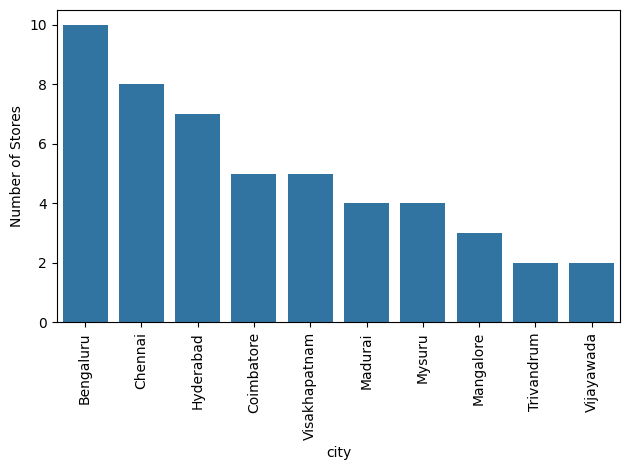

In [44]:
store_counts = df_stores_raw.groupby(['city']).agg({'store_id':'count'}).sort_values(by='store_id', ascending=False).reset_index()
sns.barplot(x='city', y='store_id', data=store_counts)
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Number of Stores')
plt.show()

✅ **Only 3 cities out of 10 have more than 5 stores**  
- **Cities:** Bengaluru, Chennai & Hyderabad

#### **Recommended Actions**  
🔹 **Leverage these markets** by increasing inventory and promotions in Bengaluru, Chennai & Hyderabad  
🔹 **Audit underperforming cities (those with ≤5 stores)** to understand barriers to expansion    
🔹 **Reallocate marketing spend** toward cities with proven high store counts to drive incremental sales               
🔹 **Pilot new store formats** or pop-ups in adjacent metros to test demand before full rollout            


#### 2. Which store recorded the highest quantity sold after the promotion during the Diwali campaign?

In [45]:
df[(df["campaign_id"] =="CAMP_DIW_01")].groupby('store_id').agg({'quantity_sold(after_promo)': 'sum'}).sort_values(by='quantity_sold(after_promo)', ascending=False)

,quantity_sold(after_promo)
store_id,
STCHE-4,5013
STBLR-7,4893
STBLR-6,4857
STCHE-7,4779
STMYS-1,4779
STBLR-0,4759
STCHE-3,4605
STHYD-0,4460
STCHE-6,4445


✅ **Store STCHE-4 led all stores with 5,013 units sold post-promotion**

#### **Recommended Actions**

🔹 **Benchmark Success Factors:** Conduct a detailed store-level audit at STCHE-4 to identify tactics (merchandising, staffing, local marketing) driving the top performance.          
  🔹 **Replicate High-Impact Practices:** Roll out any identified best practices (e.g., shelf placements, promo display layouts) across other stores, starting with those in the same region.                   
  🔹 **Optimize Inventory Allocation:** Increase stock levels of top-selling SKUs at other high-potential stores (e.g., STBLR-7, STBLR-6) to avoid stockouts and capture incremental demand.                  
  🔹 **Local Marketing Tailoring:** Analyze demographic data around STCHE-4 to refine localized promotions and community outreach for similar catchment areas.                       
  🔹 **Staff Training & Incentives:** Share STCHE-4’s sales playbooks with store managers and introduce performance-based incentives that mirror the Diwali campaign success.                  
  🔹 **Ongoing Performance Tracking:** Implement weekly dashboards to monitor post-promo sales by store, ensuring early identification of rising stars and laggards.


### 3. Identify the product category with the lowest base price before the promotion.

In [49]:
df.groupby('category')["base_price(before_promo)"].min().sort_values()

,base_price(before_promo)
category,
Personal Care,50
Home Care,55
Grocery & Staples,156
Home Appliances,350
Combo1,3000


✅ **Personal Care has the lowest base price at 50**
* **Combo1:** 3,000 - highest base price

#### **Recommended Actions**

🔹 **Upsell Complementary Items**: Offer add-on or bundle deals with higher-margin Home Care or Grocery products when customers purchase Personal Care items.                
🔹 **Introduce Premium Tiers**: Create “deluxe” versions of top-selling Personal Care SKUs to boost average order value.                
🔹 **Leverage Entry-Point Pricing**: Position Personal Care as a gateway product in marketing campaigns to attract price-sensitive shoppers.               
🔹 **Monitor Cost Trends**: Track ingredient and supply costs for Personal Care to ensure profitability at the entry-level price point.                        
🔹 **Cross-Promote**: Feature Personal Care prominently in combo offers with Home Appliances or Combo1 to drive trial and lift overall basket size.                           


#### 4. Analyze the distribution of quantity sold before the promotion for each product category (Grocery & Staples, Home Care, Personal Care, Home Appliances,etc.). What patterns or trends do you observe across these categories, and how could these insights inform future promotional strategies?

In [53]:
df_temp = df.groupby("category").agg({"quantity_sold(before_promo)": "sum"}).reset_index().sort_values(by="quantity_sold(before_promo)", ascending=False)

,category,quantity_sold(before_promo)
1,Grocery & Staples,125916.0
4,Personal Care,25514.0
0,Combo1,21730.0
3,Home Care,19834.0
2,Home Appliances,14656.0


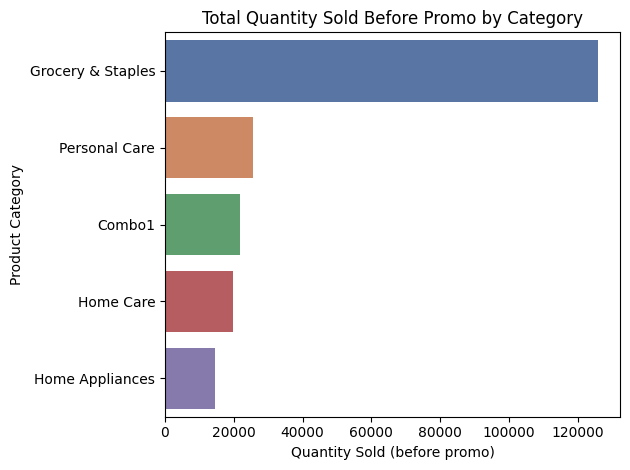

In [56]:
sns.barplot(
    data=df_temp,
    x="quantity_sold(before_promo)",
    y="category",
    palette="deep",
    hue="category"
)
plt.title("Total Quantity Sold Before Promo by Category")
plt.xlabel("Quantity Sold (before promo)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

✅ **Grocery & Staples dominates with \~125K units sold**
- **Home Appliances** and **Home Care** each move only \~1/6th of that volume (≈20,000 units each)
- **Personal Care** sits in the mid-range, closer to the 10–12 K mark

#### **Observed Patterns & Trends**

* **Heavy Skew Toward Staples**: Grocery & Staples make up roughly 70% of total units sold, indicating these are staple purchases with high, consistent demand.
* **Niche vs. Mass Appeal**: Personal Care and Combo1 exhibit similar but much lower volumes, suggesting these are more discretionary or considered buys.
* **Lower-Tier Opportunity**: Home Care and Home appliance are in the bottom. But they have potential to shift up through targeted offers.

#### **Recommended Actions**

🔹 **Tiered Discounting**
• **Staples (Grocery & Staples)**: Employ shallow, broad-reach discounts (5–10%) to drive incremental volume without eroding margin.      
• **Discretionary (Personal Care, Home Appliances)**: Use deeper, time-limited offers (15–20%) or “buy-one-get-one” deals to stimulate trial and reduce inventory.               

🔹 **Cross-Category Bundling**
• Pair Lower-volume items (e.g., a premium Home pack) with a high-velocity Grocery purchase to expose more buyers to discretionary lines.
• Create “essentials + upgrade” bundles (staples + personal care premium add-on) to lift average order value.     

🔹 **Segmentation & Targeting**
• **Loyalty Member Exclusives**: Offer extra Home Care savings to repeat buyers, leveraging their familiarity to drive up-sell.
• **New-Customer Incentives**: Promote discretionary categories with first-order coupons to build trial beyond staples.     

🔹 **Performance Monitoring:** A/B test bundle compositions and discount levels every quarter to identify the most profitable mix.


#### 5. Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories. What percentage does each category contribute to the overall sales, and what insights can be drawn from these contributions?

In [58]:
df_temp = pd.DataFrame()
df_temp = df[(df["campaign_id"] =="CAMP_SAN_01")].groupby("category").agg({"quantity_sold(after_promo)": "sum"}).sort_values(by="quantity_sold(after_promo)", ascending=False)
df_temp

,quantity_sold(after_promo)
category,
Grocery & Staples,177724
Home Appliances,35610
Home Care,16894
Combo1,12411
Personal Care,9430


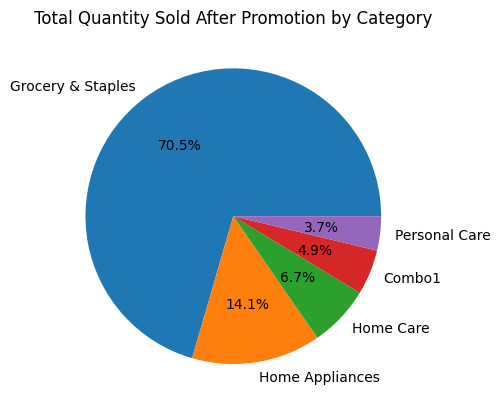

In [59]:
plt.pie(df_temp['quantity_sold(after_promo)'], labels=df_temp.index, autopct='%1.1f%%')
plt.title('Total Quantity Sold After Promotion by Category')
plt.show()

✅ **Total units sold:** 252,069       
* **Staples Dominance**: Grocery & Staples capture over two-thirds of post-promo volume, confirming that price promotions on everyday essentials drive the bulk of uplift.
* **Moderate Lift in Durables**: Home Appliances see a healthy 14 % share, suggesting that appliance buyers respond well to campaign-level incentives.
* **Under-leveraged Segments**: Personal Care and Combo1 together account for less than 9 %, indicating limited promotional pull or insufficient visibility for bundles.
* **Category Elasticity**: The steep drop from staples to all other categories highlights high price‐sensitivity in staples vs. more considered purchases elsewhere.

#### **Recommended Actions**

🔹 **Deepen Discretionary Offers**: Introduce “flash” deals or tiered rebates (e.g., extra 5 % off after 1,500 spend) on Home Care, Personal Care, and Combo1 to stimulate urgency.           
🔹 **Targeted Bundling**: Combine high-velocity staples with slower-moving SKUs (e.g., staple + personal care mini-kit) to expose more shoppers to underperforming lines.            
🔹 **Optimize Ad Spend**: Allocate more budget toward channels where discretionary categories performed best (e.g., social media for Personal Care, email for Combo1).                  
🔹 **Segmented Communication**: Use purchase history to send personalized “restock” reminders for staples and “upgrade” suggestions for appliances and home care.                               
🔹 **Post-Campaign Analysis**: Track margin impact by category to ensure promotional depths are sustainable, and A/B test different discount levels for Combo1 bundles in the next campaign.


#### 6. What is the total quantity sold after the promotion for the BOGOF promo type during the Diwali campaign?

In [60]:
df_temp = pd.DataFrame()
df_temp = df[(df["promo_type"] == "BOGOF") & (df["campaign_id"] =="CAMP_DIW_01")]
df_temp["quantity_sold(after_promo)"].sum()

np.int64(34461)

✅ **34,461 units were sold under the BOGOF promo**

#### **Recommended Actions**

🔹 **Assess Profitability**


#### 7. Which campaign saw a greater increase in sales?

In [61]:
df_temp = pd.DataFrame()
df["rev_after"]= df["base_price(after_promo)"]* df['quantity_sold(after_promo)']
df["rev_before"]= df["base_price(before_promo)"]* df['quantity_sold(before_promo)']

df_temp = df.groupby('campaign_id').agg(
    total_before_promo=('quantity_sold(before_promo)', 'sum'),
    total_after_promo=('quantity_sold(after_promo)', 'sum')
).sort_values(by='total_after_promo', ascending=False)

df_temp['percentage_increase'] = ((df_temp['total_after_promo'] - df_temp['total_before_promo']))
df_temp.reset_index(inplace=True)
df_temp

,campaign_id,total_before_promo,total_after_promo,percentage_increase
0,CAMP_SAN_01,97894.0,252069,154175.0
1,CAMP_DIW_01,109756.0,183404,73648.0


✅ **Sankranti campaign delivered the larger uplift**

* **Sankranti (CAMP\_SAN\_01):** Sales rose from 97,894 to 252,069 units, an increase of **154,175**
* **Diwali (CAMP\_DIW\_01):** Sales rose from 109,756 to 183,404 units, an increase of **73,648**

#### **Recommended Actions**

🔹 **Deep-dive analysis** into Sankranti’s promotional mechanics (timing, discount depth, creative) to distill best practices.     
🔹 **A/B test** applying Sankranti-style tactics (e.g., multi-buy offers or extended promo windows) in future Diwali or seasonal campaigns.         
🔹 **Budget reallocation** favoring channels that drove Sankranti’s lift—replicate ad placements and messaging where ROI was highest.              
🔹 **Customer feedback loop:** survey shoppers post-Sankranti to understand which incentives most influenced purchase decisions.


#### 8. Which product recorded the highest Incremental Revenue Percentage (IR%)during the Sankranti campaign? What is the IR% for this product?

In [64]:
df_temp = pd.DataFrame()
filter = (df["campaign_id"] =="CAMP_SAN_01")
df_temp =df[filter].groupby('product_code').agg(
    total_before_promo = ('rev_before', 'sum'),
    total_after_promo = ('rev_after', 'sum')
)
df_temp['incremental_revenue'] = (((df_temp['total_after_promo'] - df_temp['total_before_promo']) / df_temp['total_before_promo']) * 100).round(2)
df_temp.reset_index(inplace=True)
df_temp.sort_values(by='incremental_revenue', ascending=False)

,product_code,total_before_promo,total_after_promo,incremental_revenue
2,P03,3189600.0,6118500,91.83
14,P15,16185000.0,31027500,91.71
12,P13,1740550.0,3303125,89.77
13,P14,4542060.0,8534850,87.91
3,P04,6813550.0,12779800,87.56
7,P08,2485910.0,4649330,87.03
6,P07,583500.0,1065450,82.60
0,P01,2108376.0,2011235,-4.61
1,P02,18374760.0,17262720,-6.05
10,P11,373350.0,258970,-30.64


✅ **Product P03 posted the top IR% at 91.83%**

* **Before Promotion:** 3,189,600
* **After Promotion:** 6,118,500
* **Incremental Revenue:** +91.83%

#### **Recommended Actions**

🔹 **Scale P03 promotions** in upcoming campaigns—consider “buy more, save more” tiers to amplify lift
🔹 **Cross-sell P03** alongside lower-velocity SKUs (e.g., bundle P03 with home care essentials) to broaden exposure
🔹 **Inventory planning:** ensure ample stock of P03 during peak promo periods to prevent stock-outs and maximize revenue potential
🔹 **Margin optimization:** review cost structure on P03 to confirm that deeper discounts remain profitable at scale

#### 9. Which store in Visakhapatnam recorded the lowest Incremental Sold Units Percentage (ISU%) during the Diwali campaign? What is the ISU% for that store?

In [65]:
df_temp = pd.DataFrame()
filter = (df["city"] == "Visakhapatnam") & (df["campaign_id"] =="CAMP_DIW_01")
df_temp = df[filter].groupby('store_id').agg(
    total_quantity_before=('quantity_sold(before_promo)', 'sum'),
    total_quantity_after=('quantity_sold(after_promo)', 'sum')
)
df_temp['percentage_increase'] = (((df_temp['total_quantity_after'] - df_temp['total_quantity_before']) / df_temp['total_quantity_before']) * 100).round(2)
df_temp.reset_index(inplace=True)
df_temp.sort_values(by='percentage_increase', ascending=False)

,store_id,total_quantity_before,total_quantity_after,percentage_increase
0,STVSK-0,1768.0,3005,69.97
2,STVSK-2,1701.0,2860,68.14
1,STVSK-1,1903.0,3078,61.74
4,STVSK-4,1926.0,2908,50.99
3,STVSK-3,1780.0,2656,49.21


✅ **Store STVSK-3 had the lowest Incremental Sold Units Percentage at 49.21%**

#### **Recommended Actions**

🔹 **Local Promotion Boost:** Launch targeted in-store events or limited-time offers at STVSK-3 to reignite traffic.                
🔹 **Visual Merchandising Audit:** Review shelf placement and promotional displays at STVSK-3 against higher-performing Visakhapatnam locations (e.g., STVSK-0).                            
🔹 **Staff Engagement:** Provide additional training or incentive schemes for STVSK-3 team to drive upsell and cross-sell during promotional periods.                 
🔹 **Micro-Targeted Marketing:** Deploy geo-fenced mobile ads or SMS campaigns focused on STVSK-3’s catchment to increase awareness of Diwali offers.                  

### 10. Analyze the incremental sold units percentage (ISU%) across various cities. Identify the city with the highest ISU% after the promotion and the city with the smallest change. What trends can be observed about the effectiveness of promotions in driving sales across these cities?

In [66]:
df_temp = pd.DataFrame()
df_temp = df.groupby('city').agg(
    total_quantity_before=('quantity_sold(before_promo)', 'sum'),
    total_quantity_after=('quantity_sold(after_promo)', 'sum'),
)
df_temp['isu'] = (((df_temp['total_quantity_after'] - df_temp['total_quantity_before']) / df_temp['total_quantity_before']) * 100).round(2)
df_temp.reset_index(inplace=True)
df_temp

,city,total_quantity_before,total_quantity_after,isu
0,Bengaluru,48972.0,105141,114.70
1,Chennai,39183.0,83273,112.52
2,Coimbatore,18200.0,38900,113.74
3,Hyderabad,34335.0,69399,102.12
4,Madurai,14086.0,31169,121.28
5,Mangalore,7454.0,14929,100.28
6,Mysuru,18202.0,37470,105.86
7,Trivandrum,4884.0,10170,108.23
8,Vijayawada,5297.0,11106,109.67
9,Visakhapatnam,17037.0,33916,99.07


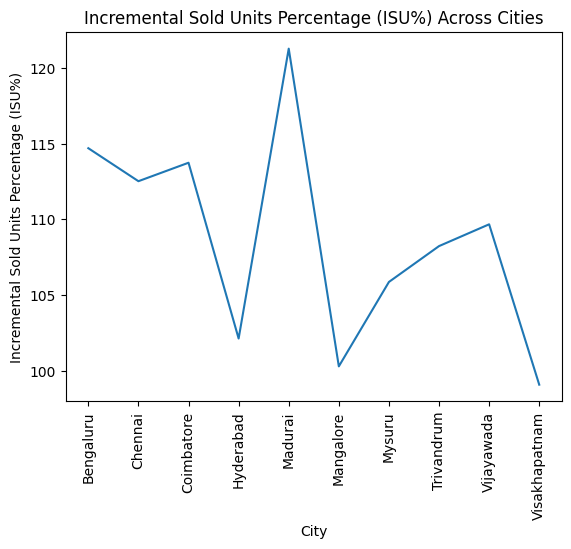

In [67]:
sns.lineplot(data=df_temp, x='city', y='isu')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Incremental Sold Units Percentage (ISU%)')
plt.title('Incremental Sold Units Percentage (ISU%) Across Cities')
plt.show()

✅ **Highest ISU%:** Madurai at **121.28%**                 
✅ **Smallest Change:** Visakhapatnam at **99.07%**, indicating post-promo sales barely outpaced pre-promo

#### **Observed Trends**

* **Emerging Markets Outperform:** Smaller cities like Madurai and Coimbatore saw the biggest relative lifts, suggesting high promotional elasticity in these regions.
* **Mature Markets Moderate Gains:** Large metros (Bengaluru, Chennai) delivered solid but lower percentage increases—likely due to already high baseline volumes.
* **Promo Saturation Signs:** Visakhapatnam and Mangalore hovering around 100% may signal market saturation or less effective messaging.

#### **Recommended Actions**

🔹 **Tiered Discount Strategy:** Apply deeper or more creative discounts in under-lifter cities (Visakhapatnam, Mangalore) and more moderate, margin-protecting promos in high-baseline metros.               
🔹 **Localized Campaign Design:** Tailor creative assets and offers to regional preferences—leverage language, local festivals, or seasonality in emerging markets.                 
🔹 **Channel Optimization:** Shift heavier spend to channels that drove the biggest lifts in each city (e.g., radio in Madurai, digital in Bengaluru).      
🔹 **Continuous A/B Testing:** Run small-scale tests on promo formats (e.g., bundle vs. percentage off) in lagging cities to discover the most compelling offers.                   
🔹 **Dynamic Inventory Allocation:** Pre-position stock according to anticipated city-level lift, ensuring supply matches promotional demand spikes.    


#### 11. Which promo type had both a negative Incremental Revenue Percentage (IR%) and Incremental Sold Units Percentage (ISU%) during the Sankranti campaign?

In [71]:
def analyze_promo_performance(df, filter_column, filter_value):
    """
    Analyze promotion performance by grouping data and calculating IR% and ISU%

    Parameters:
    df: DataFrame - source data
    filter_column: str - column name to filter on
    filter_value: str - value to filter by

    Returns:
    DataFrame with promotion analysis
    """
    filter_condition = df[filter_column] == filter_value
    df_temp = df[filter_condition].groupby('promo_type').agg(
        total_quantity_before=('quantity_sold(before_promo)', 'sum'),
        total_quantity_after=('quantity_sold(after_promo)', 'sum'),
        total_before=('rev_before', 'sum'),
        total_after=('rev_after', 'sum')
    )

    df_temp['ir'] = (((df_temp['total_after'] - df_temp['total_before']) / df_temp['total_before']) * 100).round(2)
    df_temp['isu'] = (((df_temp['total_quantity_after'] - df_temp['total_quantity_before']) / df_temp['total_quantity_before']) * 100).round(2)
    df_temp.reset_index(inplace=True)

    return df_temp

In [72]:
df_temp = analyze_promo_performance(df, "campaign_id", "CAMP_SAN_01")
df_temp

,promo_type,total_quantity_before,total_quantity_after,total_before,total_after,ir,isu
0,25% OFF,6601.0,5307,935195.0,567387,-39.33,-19.60
1,33% OFF,33624.0,47459,20483136.0,19273955,-5.90,41.15
2,50% OFF,4451.0,6100,527482.0,363564,-31.08,37.05
3,500 Cashback,5395.0,12411,16185000.0,31027500,91.71,130.05
4,BOGOF,47823.0,180792,19355170.0,36451055,88.33,278.04


✅ **25% OFF showed both negative incremental revenue and sold‐units lift**

* **IR%:** –39.33%
* **ISU%:** –19.60%

#### **Recommended Actions**

🔹 **Pause or Reassess 25% OFF:** Discontinue this shallow discount—its depth was insufficient to drive units and eroded revenue.            
🔹 **Swap to Value-Adds:** Replace with BOGOF or cashback for low-velocity SKUs to boost perceived value.                    
🔹 **Targeted Test:** If a percentage discount must be used, pilot a deeper cut (e.g., 33% OFF) on a small subset to gauge elasticity.           
🔹 **Margin Review:** Analyze cost structure for 25% OFF items to understand why even unit sales fell, then adjust pricing or promo mechanics accordingly.

### 12. Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad. Which promotion type led to the highest incremental sold units, and which one generated the highest incremental revenue? What insights can you draw from the balance between the two metrics for this city?

In [73]:
df_temp = analyze_promo_performance(df, "city", "Hyderabad")
df_temp

,promo_type,total_quantity_before,total_quantity_after,total_before,total_after,ir,isu
0,25% OFF,7288.0,6348,1547135.0,1009192,-34.77,-12.90
1,33% OFF,10404.0,15104,6015872.0,5836633,-2.98,45.17
2,50% OFF,3592.0,4883,360534.0,245212,-31.99,35.94
3,500 Cashback,3492.0,9337,10476000.0,23342500,122.82,167.38
4,BOGOF,9559.0,33727,4293700.0,7476120,74.12,252.83


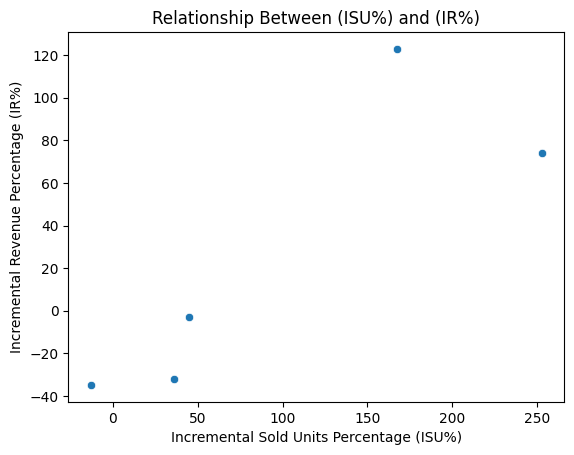

In [74]:
sns.scatterplot(data=df_temp, x='isu', y='ir')
plt.xlabel('Incremental Sold Units Percentage (ISU%)')
plt.ylabel('Incremental Revenue Percentage (IR%)')
plt.title('Relationship Between (ISU%) and (IR%)')
plt.show()

✅ **Highest ISU%:** BOGOF (252.83%)                  
✅ **Highest IR%:** 500 Cashback (122.82%)

#### **Insights**

* **Volume vs. Revenue Trade-off:** BOGOF drives the biggest unit surge but at a lower revenue lift compared to cashback.
* **Cashback’s Balance:** 500 Cashback achieved both strong unit growth and the top revenue boost—indicative of broad appeal without overly discounting list price.
* **Shallow % Discounts Underperform:** 25% and 50% OFF failed to sustain unit or revenue growth, suggesting Hyderabad shoppers prefer tangible rewards over price slashes.

#### **Recommended Actions**

🔹 **Prioritize Cashback & BOGOF:** Double down on these mechanics in Hyderabad—they optimize the balance between volume and margin.             
🔹 **Craft Hybrid Offers:** Test “BOGOF + small cashback” bundles to capture additive lifts from both formats.                
🔹 **Segment Messaging:** Use dynamic ads: promote BOGOF to bargain-driven segments and cashback to value-seeking shoppers.              
🔹 **Monitor Profitability:** Ensure the incremental revenue gains on cashback outweigh the cost of redemptions; adjust the cashback cap if needed.            
🔹 **Future A/B Tests:** Experiment with tiered cashback (e.g., 200 back on 1,000 vs. 500 back on 2,500) to find the optimal trigger point for Hyderabad buyers.


#### 13. Examine the correlation between base price (after the promotion) and sales quantities (after the promotion). What insights can be drawn regarding the relationship between base price and sales quantities after the promotion?

<Axes: >

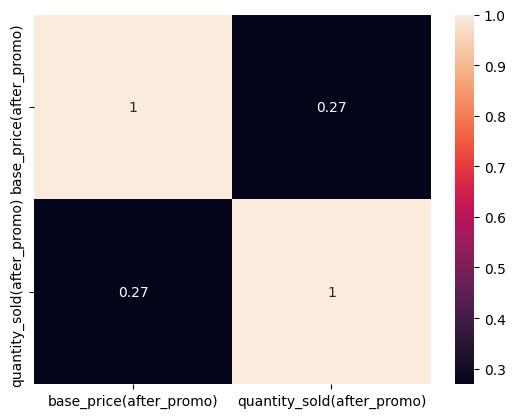

In [75]:
sns.heatmap(df[["base_price(after_promo)","quantity_sold(after_promo)"]].corr(), annot=True)

✅ **Correlation coefficient = 0.27**

#### **Insights**

* A **positive but weak correlation** (0.27) suggests that **higher-priced products slightly tend to sell more**, which **contradicts typical price-demand expectations**.
* This may indicate:

  * **Strong brand or category influence** (e.g., big-ticket items like Combo1 or Home Appliances selling well despite higher price).
  * **Effectiveness of promotions** in repositioning premium products as value-for-money.
  * **Bulk or bundled deals** driving volume in higher-price brackets.

#### **Recommended Actions**
🔹 **Buyer Intent Profiling:** Identify if higher prices align with **planned purchases** (e.g., appliances), which are **less sensitive to price drops**.     
🔹 **Bundle & Upsell Strategy:** Use this insight to **intentionally promote higher-priced SKUs**, leveraging perceived value.            
🔹 **Avoid Blanket Discounting:** Price sensitivity may not apply equally—avoid deep discounts across all price bands without validating elasticity.              

#### 14. Analyze the revenue before and after promotions across different product categories in Bengaluru. What trends can be identified in the performance of each category, and how did promotions impact overall revenue in the city?

In [76]:
df_temp = pd.DataFrame()
filter = (df["city"] == "Bengaluru")
df_temp = df[filter].groupby('category').agg(
    total_before=('rev_before', 'sum'),
    total_after=('rev_after', 'sum')
)
df_temp['ir'] = (((df_temp['total_after'] - df_temp['total_before']) / df_temp['total_before']) * 100).round(2)
df_temp.reset_index(inplace=True)
df_temp

,category,total_before,total_after,ir
0,Combo1,15777000.0,38125000,141.65
1,Grocery & Staples,12262460.0,13861259,13.04
2,Home Appliances,2188810.0,4122680,88.35
3,Home Care,2104460.0,3180020,51.11
4,Personal Care,576321.0,389629,-32.39


In [77]:
(((df_temp['total_after'].sum()-df_temp['total_before'].sum())/df_temp['total_before'].sum())*100).round(2)

np.float64(81.34)

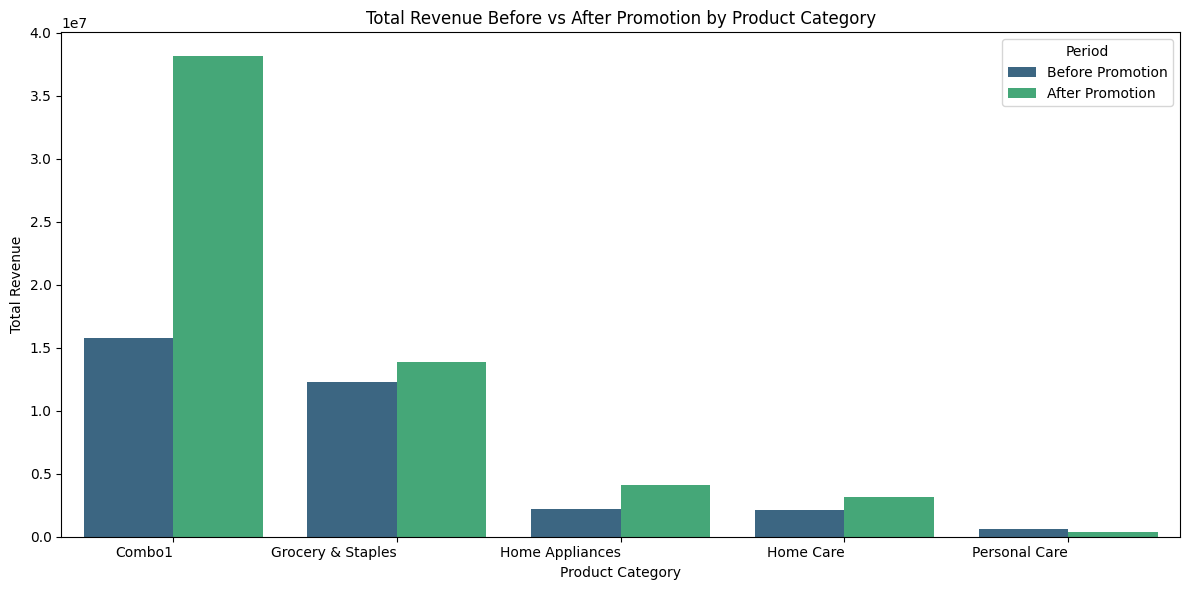

In [78]:
df_melted = df_temp.melt(
    id_vars=['category'],
    value_vars=['total_before', 'total_after'],
    var_name='period',
    value_name='total_revenue'
)

# Replace the variable names for better labels
df_melted['period'] = df_melted['period'].replace({
    'total_before': 'Before Promotion',
    'total_after': 'After Promotion'
})

# Create the side-by-side bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='category', y='total_revenue', hue='period', palette='viridis')

plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Before vs After Promotion by Product Category')
plt.xticks(ha='right')
plt.legend(title='Period')
plt.tight_layout()
plt.show()

✅ **Overall Incremental Revenue in Bengaluru: 81.34%**

#### **Key Trends**

* **Strongest Growth:** Combo1 (141.65%) likely benefited from high-ticket value and effective bundling.
* **Personal Care Slump:** Only category with a **decline in revenue**, possibly due to over-discounting, low demand elasticity, or misaligned targeting.
* **Solid Mid-Tier Gains:** Home Appliances and Home Care showed healthy increases, indicating well-placed promotional strategies.

#### **Recommended Actions**

🔹 **Double Down on Bundling:** Scale Combo1 success by designing **bundles with high-perceived value** across other categories.                

🔹 **Fix Personal Care Positioning:**
  - Reevaluate pricing, promo depth, and target audience.
  - A/B test packaging, messaging, or partner it with better-performing categories.                    

🔹 **Segregated Promotion Planning:** Avoid uniform promotional tactics—tailor discounting by category performance and historical elasticity.             
         
🔹 **Cross-Promote Appliances & Care:** Bundle Home Appliances with relevant Home or Personal Care items to raise exposure for underperforming SKUs.              
🔹 **Campaign Replication:** Replicate Bengaluru’s high-performing mechanics (esp. Combo1) in other urban markets with similar profiles.
